Garmin Connect

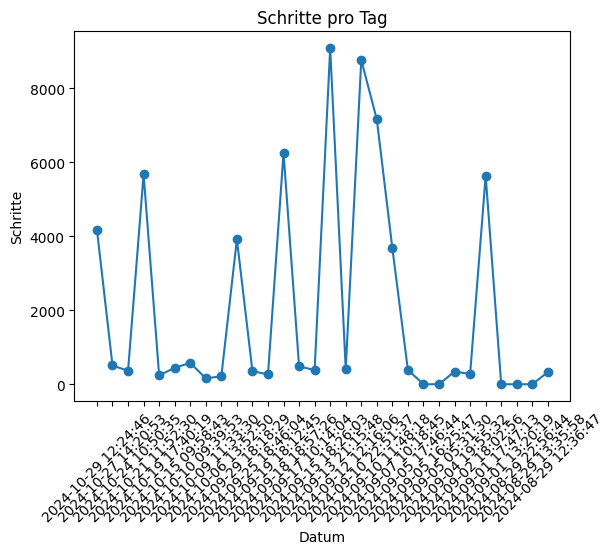

In [1]:
from garminconnect import Garmin
import matplotlib.pyplot as plt
import pandas as pd

# Ersetze diese mit deinen Garmin-Anmeldedaten
username = "janicksteffen@hotmail.com"
password = "07@Janick@98"

# Anmelden und Authentifizieren
client = Garmin(username, password)
client.login()

# Abruf der Aktivitäten-Daten (z.B. der letzten 30 Tage)
activities = client.get_activities(0, 30)  # 0 bis 30 Einträge (letzte 30 Aktivitäten)

# Daten in einem Pandas DataFrame speichern
activity_data = {
    "Date": [],
    "Steps": [],
    "Calories": [],
    "Distance_km": [],
    "Avg_HeartRate": [],
}

for activity in activities:
    activity_data["Date"].append(activity["startTimeLocal"])
    activity_data["Steps"].append(activity.get("steps", 0))
    activity_data["Calories"].append(activity.get("calories", 0))
    activity_data["Distance_km"].append(activity.get("distance", 0) / 1000)  # m to km
    activity_data["Avg_HeartRate"].append(activity.get("averageHR", 0))

df = pd.DataFrame(activity_data)

# Beispielhafte Visualisierung für Schritte
plt.plot(df["Date"], df["Steps"], marker="o", linestyle="-")
plt.xlabel("Datum")
plt.ylabel("Schritte")
plt.title("Schritte pro Tag")
plt.xticks(rotation=45)
plt.show()


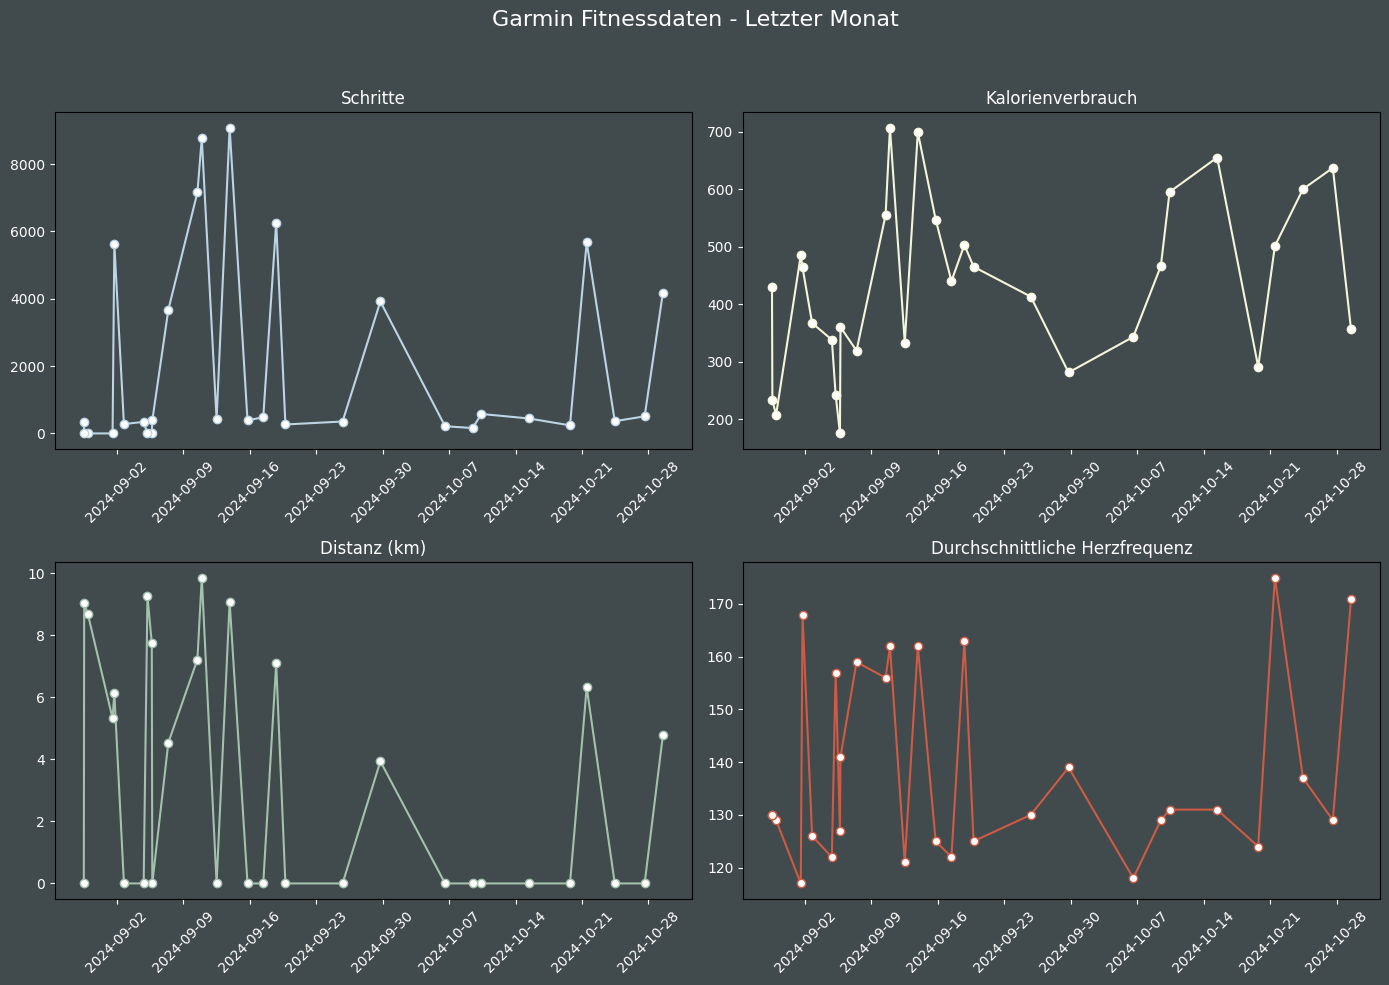

In [2]:
from garminconnect import Garmin
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

class GarminDataVisualizer:
    def __init__(self, username, password):
        self.username = username
        self.password = password
        self.client = Garmin(self.username, self.password)
        self.data = None

    def login(self):
        self.client.login()

    def fetch_data(self, start=0, limit=30):
        activities = self.client.get_activities(start, limit)
        activity_data = {
            "Date": [],
            "Steps": [],
            "Calories": [],
            "Distance_km": [],
            "Avg_HeartRate": [],
        }

        for activity in activities:
            activity_data["Date"].append(activity["startTimeLocal"])
            activity_data["Steps"].append(activity.get("steps", 0))
            activity_data["Calories"].append(activity.get("calories", 0))
            activity_data["Distance_km"].append(activity.get("distance", 0) / 1000)  # m to km
            activity_data["Avg_HeartRate"].append(activity.get("averageHR", 0))

        self.data = pd.DataFrame(activity_data)
        self.data["Date"] = pd.to_datetime(self.data["Date"])

    def plot_data(self):
        if self.data is None:
            raise ValueError("Data not fetched. Please fetch data first.")

        # Einstellungen für das Layout
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        fig.patch.set_facecolor("#414a4c")
        fig.suptitle("Garmin Fitnessdaten - Letzter Monat", color="white", fontsize=16)

        # Farb- und Titelzuordnungen für Diagramme
        plots = [
            ("Steps", "#bcd4e6", "Schritte"),
            ("Calories", "#f5f5dc", "Kalorienverbrauch"),
            ("Distance_km", "#a3c1ad", "Distanz (km)"),
            ("Avg_HeartRate", "#cd5b45", "Durchschnittliche Herzfrequenz")
        ]

        # Plot für jedes Diagramm
        for ax, (metric, color, title) in zip(axes.flat, plots):
            ax.plot(self.data["Date"], self.data[metric], color=color, marker="o", markerfacecolor="white")
            ax.set_title(title, color="white")
            ax.tick_params(axis="x", colors="white")
            ax.tick_params(axis="y", colors="white")
            ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
            ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
            for label in ax.get_xticklabels():
                label.set_rotation(45)
            ax.set_facecolor("#414a4c")

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

# Nutzung der Klasse
username = "janicksteffen@hotmail.com"
password = "07@Janick@98"
visualizer = GarminDataVisualizer(username, password)

# Authentifizierung und Abruf der Daten
visualizer.login()
visualizer.fetch_data(start=0, limit=30)
visualizer.plot_data()


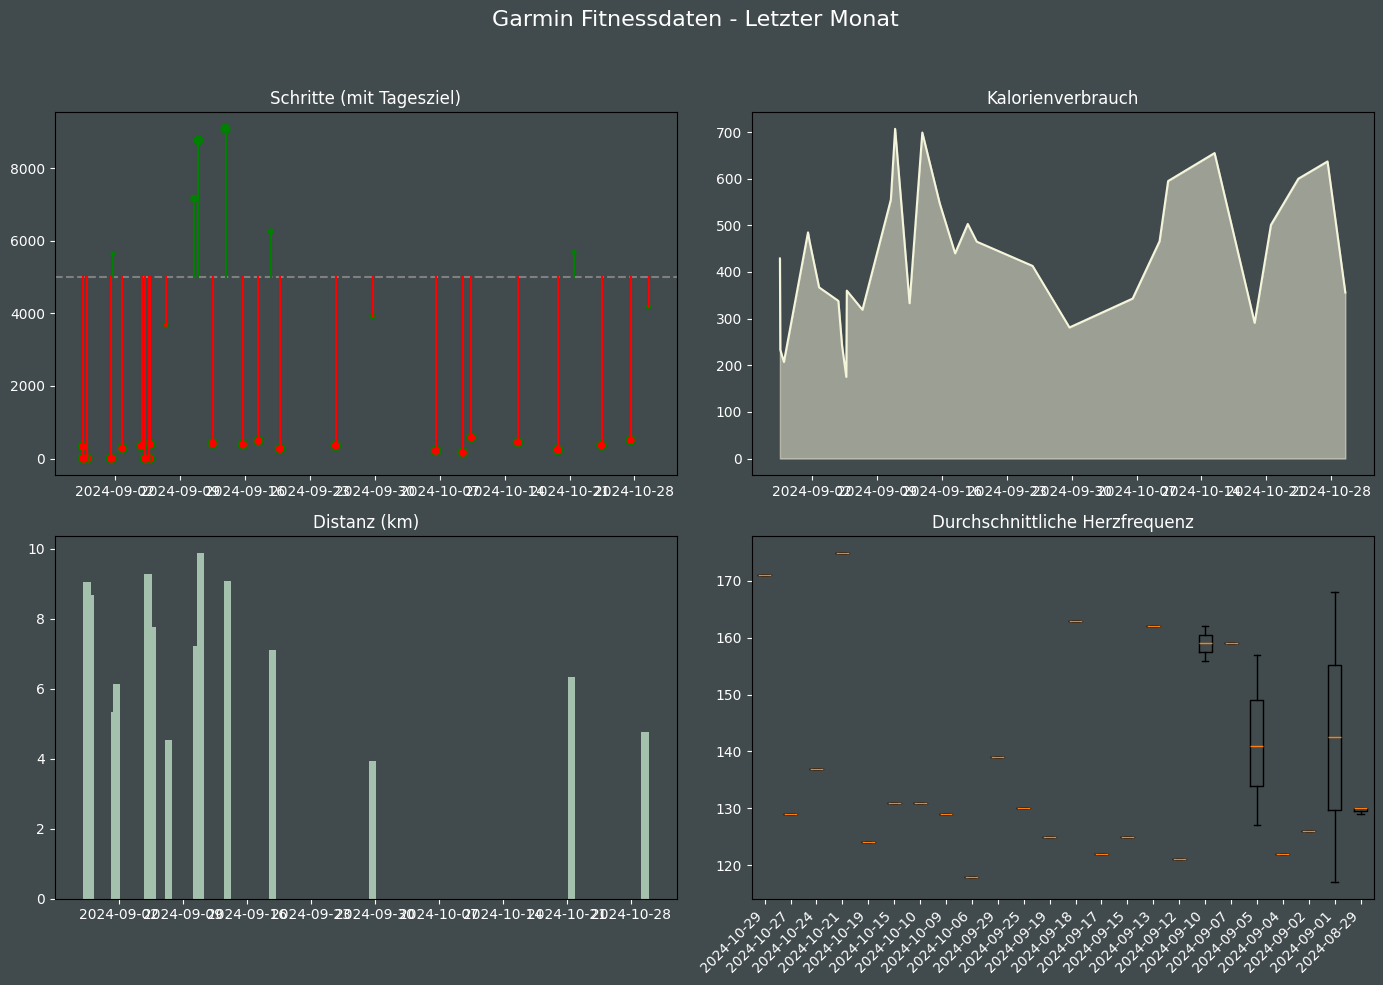

In [3]:
from garminconnect import Garmin
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import numpy as np

class GarminDataVisualizer:
    def __init__(self, username, password):
        self.username = username
        self.password = password
        self.client = Garmin(self.username, self.password)
        self.data = None
        self.daily_goal = 5000  # Setze das Tagesziel für Schritte

    def login(self):
        self.client.login()

    def fetch_data(self, start=0, limit=30):
        activities = self.client.get_activities(start, limit)
        activity_data = {
            "Date": [],
            "Steps": [],
            "Calories": [],
            "Distance_km": [],
            "Avg_HeartRate": [],
        }

        for activity in activities:
            activity_data["Date"].append(activity["startTimeLocal"])
            activity_data["Steps"].append(activity.get("steps", 0))
            activity_data["Calories"].append(activity.get("calories", 0))
            activity_data["Distance_km"].append(activity.get("distance", 0) / 1000)  # m to km
            activity_data["Avg_HeartRate"].append(activity.get("averageHR", 0))

        self.data = pd.DataFrame(activity_data)
        self.data["Date"] = pd.to_datetime(self.data["Date"])

    def plot_data(self):
        if self.data is None:
            raise ValueError("Data not fetched. Please fetch data first.")

        # Layout der Plots
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))
        fig.patch.set_facecolor("#414a4c")  # Hintergrundfarbe des gesamten Plots
        fig.suptitle("Garmin Fitnessdaten - Letzter Monat", color="white", fontsize=16)

        # Schritte: Scatterplot mit Verbindungslinien zum Tagesziel
        ax_steps = axes[0, 0]
        sizes = abs(self.data["Steps"] - self.daily_goal) / 100  # Größe der Punkte basierend auf Abweichung
        colors = ["green" if step >= self.daily_goal else "red" for step in self.data["Steps"]]
        ax_steps.scatter(self.data["Date"], self.data["Steps"], s=sizes, c=colors, edgecolor="green", facecolor="white")
        ax_steps.axhline(y=self.daily_goal, color="grey", linestyle="--", label="Tagesziel")
        for i, step in enumerate(self.data["Steps"]):
            color = "green" if step >= self.daily_goal else "red"
            ax_steps.plot([self.data["Date"][i], self.data["Date"][i]], [step, self.daily_goal], color=color)
        ax_steps.set_title("Schritte (mit Tagesziel)", color="white")
        ax_steps.tick_params(axis="x", colors="white")
        ax_steps.tick_params(axis="y", colors="white")
        ax_steps.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
        ax_steps.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

        # Kalorienverbrauch: Fläche füllen
        ax_calories = axes[0, 1]
        ax_calories.fill_between(self.data["Date"], self.data["Calories"], color="#f5f5dc", alpha=0.5)
        ax_calories.plot(self.data["Date"], self.data["Calories"], color="#f5f5dc")
        ax_calories.set_title("Kalorienverbrauch", color="white")
        ax_calories.tick_params(axis="x", colors="white")
        ax_calories.tick_params(axis="y", colors="white")
        ax_calories.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
        ax_calories.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

        # Distanz: Balkendiagramm
        ax_distance = axes[1, 0]
        ax_distance.bar(self.data["Date"], self.data["Distance_km"], color="#a3c1ad")
        ax_distance.set_title("Distanz (km)", color="white")
        ax_distance.tick_params(axis="x", colors="white")
        ax_distance.tick_params(axis="y", colors="white")
        ax_distance.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
        ax_distance.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

        # Herzfrequenz: Boxplot pro Tag
        ax_hr = axes[1, 1]
        hr_data = [self.data["Avg_HeartRate"][self.data["Date"].dt.date == date] for date in self.data["Date"].dt.date.unique()]
        ax_hr.boxplot(hr_data, positions=range(len(hr_data)))
        ax_hr.set_xticks(range(len(hr_data)))
        ax_hr.set_xticklabels([date.strftime("%Y-%m-%d") for date in self.data["Date"].dt.date.unique()], rotation=45, ha="right", color="white")
        ax_hr.set_title("Durchschnittliche Herzfrequenz", color="white")
        ax_hr.tick_params(axis="x", colors="white")
        ax_hr.tick_params(axis="y", colors="white")

        # Anpassung und Anzeige
        for ax in axes.flat:
            ax.set_facecolor("#414a4c")
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

# Nutzung der Klasse
username = "janicksteffen@hotmail.com"
password = "07@Janick@98"
visualizer = GarminDataVisualizer(username, password)

# Authentifizierung und Abruf der Daten
visualizer.login()
visualizer.fetch_data(start=0, limit=30)
visualizer.plot_data()
